## Lesson 2: Data Cleaning - Handling Missing Values and Outliers

Welcome to Lesson 2! Now that you know the basics of R and data import, let's learn about **data cleaning** - one of the most important skills in data science.

**What is Data Cleaning?**
- The process of detecting and correcting errors and inconsistencies in data
- Handling missing values (NAs) and outliers
- Preparing data for analysis and visualization

**Why is it important?**
- Real-world data is often messy and incomplete
- Poor data quality leads to incorrect analysis results
- "Garbage in, garbage out" - clean data is essential for reliable insights


## Loading Required Packages

For data cleaning, we'll use the **tidyverse** collection of packages, which includes powerful tools for:
- **dplyr**: Data manipulation (filtering, selecting, mutating)
- **ggplot2**: Data visualization 
- **tidyr**: Data reshaping and cleaning

Let's load the tidyverse package that contains all these tools:

In [1]:
# Load necessary packages
library(tidyverse) # Loads dplyr, ggplot2, tidyr, and other data science tools

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Creating Sample Data with Missing Values and Outliers

For this lesson, we'll create a realistic dataset that contains common data problems:
- **Missing values (NAs)**: Some data points are missing
- **Outliers**: Extreme values that are very different from the rest

**About our sample dataset:**
- **ID**: Unique identifier for each observation
- **Sales**: Sales amounts (we'll add some outliers here)
- **Profit**: Profit values (we'll introduce missing values)
- **Region**: Geographic regions (categorical data)

**Why we use set.seed(123):**
- Makes our random data reproducible
- Everyone running this code will get the same "random" numbers
- Essential for consistent results in tutorials and research

In [2]:
# 1. Creating a sample dataset with missing values and outliers
set.seed(123) # Ensures reproducible random numbers
data_clean <- data.frame(
  ID = 1:20, # Sequential ID numbers from 1 to 20
  Sales = c(rnorm(18, mean = 100, sd = 20), 500, 10), # 18 normal values + 2 outliers (500, 10)
  Profit = c(rnorm(19, mean = 10, sd = 5), -30), # 19 normal values + 1 outlier (-30)
  Region = sample(c("East", "West", "North", "South"), 20, replace = TRUE) # Random regions
)

# Introduce some missing values
data_clean[c(3, 7, 15), "Sales"] <- NA # Set rows 3, 7, 15 Sales to missing
data_clean[c(5, 12), "Profit"] <- NA # Set rows 5, 12 Profit to missing

print(data_clean) # Display the dataset

   ID     Sales     Profit Region
1   1  88.79049  13.506780  North
2   2  95.39645   7.636043   West
3   3        NA   4.660881  South
4   4 101.41017   8.910125  North
5   5 102.58575         NA  South
6   6 134.30130   6.355544  South
7   7        NA   6.874804   West
8   8  74.69878   1.566533   West
9   9  86.26294  14.188935  North
10 10  91.08676  10.766866  South
11 11 124.48164   4.309315   West
12 12 107.19628         NA   West
13 13 108.01543  12.132321  North
14 14 102.21365   8.524643  North
15 15        NA  14.475628  South
16 16 135.73826  14.390667   East
17 17 109.95701  14.107905   West
18 18  60.66766  13.443201   West
19 19 500.00000  12.769588   East
20 20  10.00000 -30.000000   West


## Understanding Missing Values (NAs)

**Missing values** are represented by `NA` (Not Available) in R. They're common in real-world data due to:
- Data entry errors
- Equipment failures
- Survey non-responses
- Data not applicable to certain cases

**Key functions for detecting missing values:**
- `is.na()`: Returns TRUE/FALSE for each value
- `sum(is.na())`: Counts missing values
- `complete.cases()`: Identifies rows with no missing values

Let's explore our dataset to see where the missing values are:

In [ ]:
# 2. Identifying Missing Values

# Check for NA values in the entire data frame
is.na(data_clean) # Returns TRUE/FALSE matrix showing where NAs are located

ID,Sales,Profit,Region
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE


## Counting Missing Values

Now let's get a summary of how many missing values we have in each column. This helps us understand the extent of the missing data problem:

**`sapply()` function:**
- Applies a function to each column of a data frame
- Very useful for getting summaries across multiple columns
- Here we're counting NAs in each column

In [3]:
# Count NA values per column
sapply(data_clean, function(x) sum(is.na(x))) # Apply sum(is.na()) to each column

# Count total NA values in the data frame
sum(is.na(data_clean)) # Total number of missing values across all columns

# Identify rows with any NA values
data_clean[!complete.cases(data_clean), ] # Show only rows that have at least one NA

ID  Sales Profit Region 
     0      3      2      0

[1] 5

,ID,Sales,Profit,Region
,<int>,<dbl>,<dbl>,<chr>
3,3,NA,4.660881,South
5,5,102.5858,NA,South
7,7,NA,6.874804,West
12,12,107.1963,NA,West
15,15,NA,14.475628,South


## Strategy 1: Removing Rows with Missing Values

**Complete case analysis** is the simplest approach - just remove any row that has missing values.

**Pros:**
- Simple and straightforward
- No need to make assumptions about missing data

**Cons:**
- Loses potentially valuable data
- Can reduce sample size significantly
- May introduce bias if missing data isn't random

**When to use:** When you have plenty of data and missing values are random.

In [ ]:
# 3. Strategies for Handling Missing Values

# a) Removal of rows with NA values
data_removed_na <- na.omit(data_clean) # Remove all rows containing any NA values
print("Data after removing NA rows:")
print(data_removed_na) # Display the cleaned dataset

[1] "Data after removing NA rows:"
   ID     Sales     Profit Region
1   1  88.79049  13.506780  North
2   2  95.39645   7.636043   West
4   4 101.41017   8.910125  North
6   6 134.30130   6.355544  South
8   8  74.69878   1.566533   West
9   9  86.26294  14.188935  North
10 10  91.08676  10.766866  South
11 11 124.48164   4.309315   West
13 13 108.01543  12.132321  North
14 14 102.21365   8.524643  North
16 16 135.73826  14.390667   East
17 17 109.95701  14.107905   West
18 18  60.66766  13.443201   West
19 19 500.00000  12.769588   East
20 20  10.00000 -30.000000   West


## Strategy 2: Imputation - Mean Replacement

**Mean imputation** replaces missing values with the average of the non-missing values.

**How it works:**
- Calculate the mean of all non-missing values in a column
- Replace each NA with this mean value
- Use `na.rm = TRUE` to exclude NAs from the mean calculation

**When to use:**
- For numeric data that's roughly normally distributed
- When missing values are random
- When you want to preserve the overall sample size

**Note:** Mean imputation reduces variability in the data, so use it carefully!

In [ ]:
# b) Imputation: Replacing NA values

# Mean imputation for 'Sales'
data_imputed_mean <- data_clean %>%
  mutate(Sales_imputed_mean = ifelse(is.na(Sales), # If Sales is NA...
                                   mean(Sales, na.rm = TRUE), # Replace with mean (excluding NAs)
                                   Sales)) # Otherwise keep original value
print("Data after mean imputation for Sales:")
print(data_imputed_mean)

[1] "Data after mean imputation for Sales:"
   ID     Sales     Profit Region Sales_imputed_mean
1   1  88.79049  13.506780  North           88.79049
2   2  95.39645   7.636043   West           95.39645
3   3        NA   4.660881  South          119.57662
4   4 101.41017   8.910125  North          101.41017
5   5 102.58575         NA  South          102.58575
6   6 134.30130   6.355544  South          134.30130
7   7        NA   6.874804   West          119.57662
8   8  74.69878   1.566533   West           74.69878
9   9  86.26294  14.188935  North           86.26294
10 10  91.08676  10.766866  South           91.08676
11 11 124.48164   4.309315   West          124.48164
12 12 107.19628         NA   West          107.19628
13 13 108.01543  12.132321  North          108.01543
14 14 102.21365   8.524643  North          102.21365
15 15        NA  14.475628  South          119.57662
16 16 135.73826  14.390667   East          135.73826
17 17 109.95701  14.107905   West          109.95701
18

## Strategy 3: Imputation - Median Replacement

**Median imputation** replaces missing values with the median (middle value) of non-missing values.

**Why use median instead of mean?**
- **Robust to outliers**: Extreme values don't affect the median as much
- **Better for skewed data**: When data isn't normally distributed
- **More representative**: Often closer to "typical" values in the dataset

**When to use:**
- When your data has outliers
- When data is skewed (not bell-shaped)
- For ordinal data or continuous data with extreme values

In [5]:
# Median imputation for 'Profit'
data_imputed_median <- data_clean %>%
  mutate(Profit_imputed_median = ifelse(is.na(Profit), # If Profit is NA...
                                      median(Profit, na.rm = TRUE), # Replace with median (excluding NAs)
                                      Profit)) # Otherwise keep original value
print("Data after median imputation for Profit:")
print(data_imputed_median)

[1] "Data after median imputation for Profit:"
   ID     Sales     Profit Region Profit_imputed_median
1   1  88.79049  13.506780  North             13.506780
2   2  95.39645   7.636043   West              7.636043
3   3        NA   4.660881  South              4.660881
4   4 101.41017   8.910125  North              8.910125
5   5 102.58575         NA  South              9.838496
6   6 134.30130   6.355544  South              6.355544
7   7        NA   6.874804   West              6.874804
8   8  74.69878   1.566533   West              1.566533
9   9  86.26294  14.188935  North             14.188935
10 10  91.08676  10.766866  South             10.766866
11 11 124.48164   4.309315   West              4.309315
12 12 107.19628         NA   West              9.838496
13 13 108.01543  12.132321  North             12.132321
14 14 102.21365   8.524643  North              8.524643
15 15        NA  14.475628  South             14.475628
16 16 135.73826  14.390667   East             14.390667
1

## Strategy 4: Mode Imputation for Categorical Data

**Mode imputation** replaces missing values with the most frequently occurring value (the mode).

**Perfect for categorical data:**
- Text variables like Region, Product Type, etc.
- Any data where average doesn't make sense
- When you want to use the "most common" response

**Creating a mode function:**
Since R doesn't have a built-in mode function, we create our own. This function:
1. Finds all unique values
2. Counts how often each occurs
3. Returns the most frequent one

**Note:** Our Region column doesn't have NAs, but this shows how you'd handle them if they existed.

In [4]:
# Mode imputation for 'Region' (if it had NAs, for demonstration)
# Function to calculate mode (most frequent value)
get_mode <- function(v) {
  uniqv <- unique(v) # Get unique values
  uniqv[which.max(tabulate(match(v, uniqv)))] # Return the most frequent one
}

# Example: if Region had NAs, impute with mode
# data_imputed_mode <- data_clean %>%
#   mutate(Region_imputed_mode = ifelse(is.na(Region), # If Region is NA...
#                                     get_mode(Region[!is.na(Region)]), # Replace with mode
#                                     Region)) # Otherwise keep original
# print("Data after mode imputation for Region:")
# print(data_imputed_mode)

## Understanding Outliers

**Outliers** are data points that are significantly different from other observations. They can be:
- **Legitimate extreme values**: A luxury car sale in a dataset of regular cars
- **Data entry errors**: Someone typed 5000 instead of 500
- **Measurement errors**: Equipment malfunction

**Why outliers matter:**
- Can skew statistical analyses (mean, standard deviation)
- May indicate important rare events
- Can dominate visualizations and hide patterns
- Need careful consideration - don't just delete them!

Let's visualize our data to spot outliers using plots:

Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


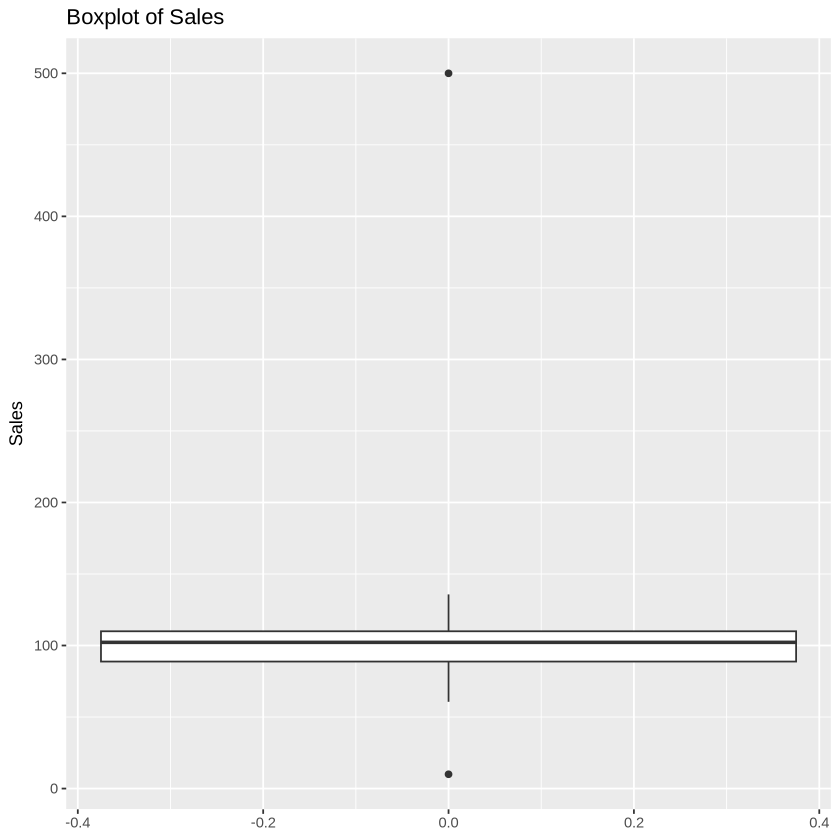

In [9]:
# 4. Identifying and Visualizing Outliers

# Boxplot for Sales
ggplot(data_clean, aes(y = Sales)) + # Set Sales on y-axis
  geom_boxplot() + # Create boxplot (shows median, quartiles, and outliers)
  ggtitle("Boxplot of Sales") # Add title

## Scatter Plot for Relationship Analysis

**Scatter plots** help us see:
- Relationships between two variables
- Whether outliers affect both variables
- Patterns in the data

In our scatter plot, we're looking at the relationship between Profit and Sales. Outliers might appear as points far from the main cluster of data.

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


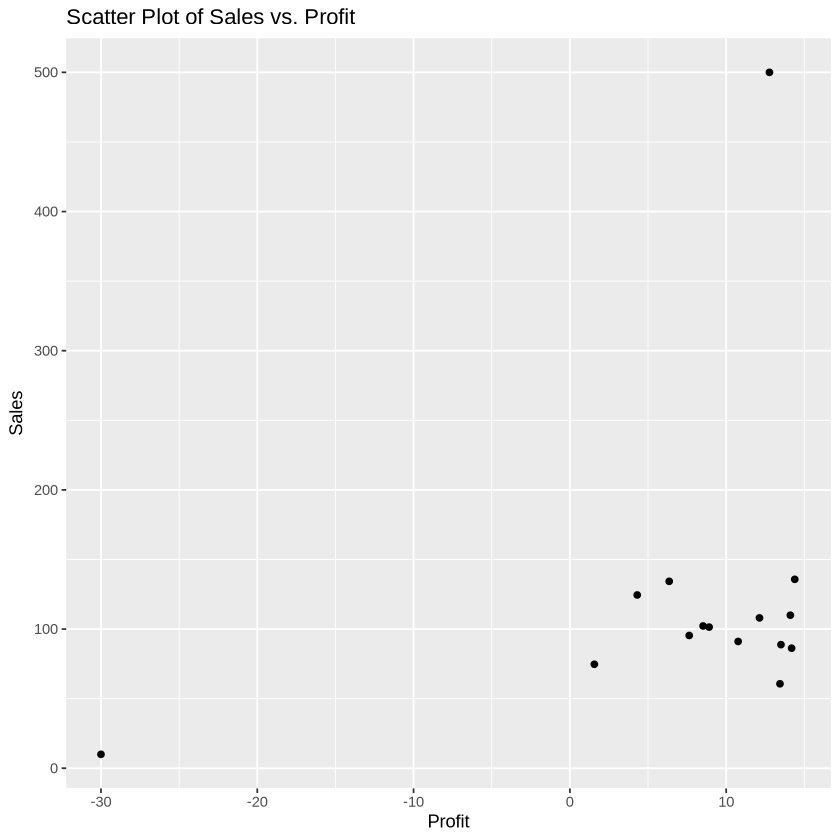

In [8]:
# Scatter plot for Sales vs. Profit
ggplot(data_clean, aes(x = Profit, y = Sales)) + # Set Profit on x-axis, Sales on y-axis
  geom_point() + # Add points for each observation
  ggtitle("Scatter Plot of Sales vs. Profit") # Add title

## The IQR Method for Detecting Outliers

**IQR (Interquartile Range)** is a statistical method to identify outliers:

**How it works:**
1. **Q1**: 25th percentile (first quartile)
2. **Q3**: 75th percentile (third quartile)  
3. **IQR**: Q3 - Q1 (the range containing middle 50% of data)
4. **Outlier boundaries**: 
   - Lower: Q1 - 1.5 × IQR
   - Upper: Q3 + 1.5 × IQR

**Why 1.5 × IQR?** 
- Standard statistical convention
- Captures about 99.3% of normal data
- Points beyond these boundaries are considered outliers

Let's apply this method to identify outliers in our Sales data:

In [6]:
# Using IQR method to identify outliers
# For Sales
Q1_sales <- quantile(data_clean$Sales, 0.25, na.rm = TRUE) # 25th percentile
Q3_sales <- quantile(data_clean$Sales, 0.75, na.rm = TRUE) # 75th percentile
IQR_sales <- Q3_sales - Q1_sales # Interquartile range

# Calculate outlier boundaries using 1.5 * IQR rule
outlier_threshold_upper_sales <- Q3_sales + 1.5 * IQR_sales # Upper boundary
outlier_threshold_lower_sales <- Q1_sales - 1.5 * IQR_sales # Lower boundary

# Find and display outliers
data_clean %>%
  filter(Sales > outlier_threshold_upper_sales | Sales < outlier_threshold_lower_sales)

ID,Sales,Profit,Region
<int>,<dbl>,<dbl>,<chr>
19,500,12.76959,East
20,10,-30.00000,West


## Identifying Outliers in Profit Data

Let's apply the same IQR method to our Profit variable. This will help us identify any extreme profit values that might be errors or unusual business events.

**The process is identical:**
1. Calculate Q1, Q3, and IQR for Profit
2. Set outlier boundaries using 1.5 × IQR rule
3. Filter data to show only outliers

This systematic approach ensures we're consistent in how we identify outliers across different variables.

In [7]:
# For Profit
Q1_profit <- quantile(data_clean$Profit, 0.25, na.rm = TRUE) # 25th percentile
Q3_profit <- quantile(data_clean$Profit, 0.75, na.rm = TRUE) # 75th percentile
IQR_profit <- Q3_profit - Q1_profit # Interquartile range

# Calculate outlier boundaries using 1.5 * IQR rule
outlier_threshold_upper_profit <- Q3_profit + 1.5 * IQR_profit # Upper boundary
outlier_threshold_lower_profit <- Q1_profit - 1.5 * IQR_profit # Lower boundary

# Find and display outliers
data_clean %>%
  filter(Profit > outlier_threshold_upper_profit | Profit < outlier_threshold_lower_profit)

ID,Sales,Profit,Region
<int>,<dbl>,<dbl>,<chr>
20,10,-30,West


## Outlier Treatment Method 1: Capping (Winsorization)

**Capping** (also called Winsorization) replaces outliers with the boundary values rather than removing them entirely.

**How it works:**
- Values above the upper threshold → replaced with upper threshold
- Values below the lower threshold → replaced with lower threshold  
- All other values remain unchanged

**Advantages:**
- Keeps all data points (no sample size reduction)
- Reduces impact of extreme values
- Preserves the relative ranking of most data

**When to use:**
- When outliers are likely errors but you want to keep the observations
- When sample size is important
- When outliers are affecting statistical analyses

In [ ]:
# 5. Basic Outlier Treatment

# a) Capping (Winsorization) for Sales
# Replace outliers with the upper/lower threshold
data_capped <- data_clean %>%
  mutate(Sales_capped = ifelse(Sales > outlier_threshold_upper_sales, # If above upper threshold...
                              outlier_threshold_upper_sales, # Replace with upper threshold
                              ifelse(Sales < outlier_threshold_lower_sales, # If below lower threshold...
                                    outlier_threshold_lower_sales, # Replace with lower threshold
                                    Sales))) # Otherwise keep original value
print("Data after capping Sales outliers:")
print(data_capped)

In [10]:
# b) Removal of outliers
data_outliers_removed <- data_clean %>%
  # Keep only rows where Sales is within acceptable range
  filter(Sales <= outlier_threshold_upper_sales & Sales >= outlier_threshold_lower_sales) %>%
  # Keep only rows where Profit is within acceptable range
  filter(Profit <= outlier_threshold_upper_profit & Profit >= outlier_threshold_lower_profit)
print("Data after removing outliers:")
print(data_outliers_removed)

[1] "Data after removing outliers:"
   ID     Sales    Profit Region
1   1  88.79049 13.506780  North
2   2  95.39645  7.636043   West
3   4 101.41017  8.910125  North
4   6 134.30130  6.355544  South
5   8  74.69878  1.566533   West
6   9  86.26294 14.188935  North
7  10  91.08676 10.766866  South
8  11 124.48164  4.309315   West
9  13 108.01543 12.132321  North
10 14 102.21365  8.524643  North
11 16 135.73826 14.390667   East
12 17 109.95701 14.107905   West
13 18  60.66766 13.443201   West


## Outlier Treatment Method 2: Removal

**Outlier removal** completely eliminates rows containing outlier values from the dataset.

**How it works:**
- Apply filters to keep only data within the acceptable range
- Remove entire rows if they contain outliers in any specified column
- Results in a "cleaner" but smaller dataset

**Advantages:**
- Eliminates problematic extreme values
- Simpler statistical analyses
- Clear, unambiguous approach

**Disadvantages:**
- Permanent loss of data
- Reduces sample size
- May remove legitimate but rare observations

**Important decision:** Always document why you're removing outliers and consider domain expertise!

In [ ]:
## Key Decisions in Data Cleaning

**Important principle:** The choice of how to handle missing values and outliers depends on:

### 📊 **Context and Domain Knowledge**
- **Business understanding**: Is a $500 sale realistic or an error?
- **Data collection process**: How were these values recorded?
- **Impact on analysis**: Will outliers skew our results?

### 📝 **Documentation is Critical**
- **Record your decisions**: What did you change and why?
- **Be transparent**: Others need to understand your methodology
- **Consider alternatives**: What would happen with different approaches?

### ⚖️ **Trade-offs to Consider**
- **Sample size vs. data quality**: Remove vs. impute?
- **Bias vs. completeness**: Are missing values random?
- **Accuracy vs. precision**: Better to be approximately right than precisely wrong

**Remember:** There's rarely one "correct" way to clean data - it's about making informed, defensible decisions!

In [ ]:
# Note: The choice of handling missing values and outliers depends on the context and domain knowledge.
# Always document your decisions and reasoning for future reference.

## Lesson 2 Summary: Data Cleaning Mastery

Congratulations! You've learned essential data cleaning techniques. Here's what you can now do:

### 🔍 **Missing Value Detection**
- Use `is.na()` to identify missing values
- Count NAs with `sum(is.na())` and `sapply()`
- Find incomplete rows with `complete.cases()`

### 🛠️ **Missing Value Treatment Strategies**
- **Removal**: `na.omit()` for complete case analysis
- **Mean imputation**: Replace NAs with average values
- **Median imputation**: Better for skewed data and outliers
- **Mode imputation**: For categorical variables

### 📊 **Outlier Detection Methods**
- **Visual inspection**: Boxplots and scatter plots
- **IQR method**: Statistical approach using quartiles
- **Threshold calculation**: Q1/Q3 ± 1.5 × IQR

### ⚒️ **Outlier Treatment Techniques**
- **Capping (Winsorization)**: Replace with boundary values
- **Removal**: Filter out extreme values
- **Documentation**: Always record your decisions and reasoning

### 🎯 **Key Takeaways**
- **No single correct approach**: Context and domain knowledge matter
- **Document everything**: Your future self will thank you
- **Consider trade-offs**: Sample size vs. data quality
- **Visualize first**: Always look at your data before cleaning

### 📈 **Next Steps**
You're now ready for:
- Advanced data manipulation with dplyr
- Data transformation and feature engineering
- Statistical analysis with clean, reliable data
- Creating meaningful visualizations

**Practice tip:** Try these techniques on real datasets to build your data cleaning intuition!